# 0184923-李龙琦-实验报告

In [1]:
import pandas as pd
import pdfplumber
import re
import os

* 将PDF转成TXT

In [2]:
def pdf_txt(pdf_path):
    txt_path = pdf_path[0:-4]+'.txt'
    f_txt=open(txt_path,'w',encoding='utf-8')
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages[0:20]:
            text=page.extract_text()
            if text !=None:
                f_txt.write(text)
            else:
                pass
    f_txt.close()
    return()

* #将PDF和TXT分装进两个列表

In [3]:
path = "C:\\Users\\mac\\Desktop\\年报"
total_pdf = os.listdir(path) 
for item in total_pdf:
    path = 'C:\\Users\\mac\\Desktop\\年报\\'+item
    pdf_txt(path)
path = "C:\\Users\\mac\\Desktop\\年报"
total = os.listdir(path)    
pdf_files = []
txt_files = []
for f in total:
    if f[-4:] == '.pdf':
        pdf_files.append(f)
    else:
        txt_files.append(f)

In [4]:
pdf_files

['300235：2019年年度报告.pdf',
 '300291：2019年年度报告.pdf',
 '300316：2019年年度报告.pdf',
 '300363：2019年年度报告.pdf',
 '300370：2019年年度报告.pdf',
 '300428：2019年年度报告.pdf',
 '300442：2019年年度报告.pdf',
 '300451：2019年年度报告.pdf',
 '300460：2019年年度报告.pdf',
 '300492：2019年年度报告.pdf',
 '300502：2019年年度报告.pdf']

In [5]:
txt_files

['300235：2019年年度报告.txt',
 '300291：2019年年度报告.txt',
 '300316：2019年年度报告.txt',
 '300363：2019年年度报告.txt',
 '300370：2019年年度报告.txt',
 '300428：2019年年度报告.txt',
 '300442：2019年年度报告.txt',
 '300451：2019年年度报告.txt',
 '300460：2019年年度报告.txt',
 '300492：2019年年度报告.txt',
 '300502：2019年年度报告.txt']

* 提取各家公司的基本信息和财务信息，整理成一个列表

In [6]:
info_list = []

for txt_item in txt_files:
    txt_path = 'C:\\Users\\mac\\Desktop\\年报\\' + txt_item
    f = open(txt_path,'r',encoding='utf-8')
    text = f.read()
    f.close()

    #爬取基本信息（股票简称、股票代码、公司的法定代表人、办公地址、公司网址、电子信箱）
    start_index = text.find('一、公司信息')
    end_index = text.find('三、信息披露及备置地点')
    bsc_text = text[start_index:end_index]
    index_name = ["股票简称","股票代码","公司的法定代表人","办公地址","公司国际互联网网址","电子信箱"]
    index_name_cut = ["股票代码","公司的中文名称","注册地址","办公地址的邮政编码","电子信箱","二、联系人和联系方式"]
    bsc_info = []
    pattern = ""
    t = 0
    while t < len(index_name):
        pattern = str(index_name[t]) + "(.*?)" + str(index_name_cut[t])
        info = re.findall(pattern,bsc_text,re.S)[0].strip()
        bsc_info.append(info)
        t += 1
    #爬取财务信息（最近三年归属于上市公司股东的扣除非经常性损益的净利润（元））
    start_index2 = text.find('主要会计数据和财务指标')
    end_index2 = text.find('境内外会计准则下会计数据差异')
    eco_text = text[start_index2:end_index2]
    inco = re.findall("归属于上市公司[\u4E00-\u9FA5]*股东的扣除(.*?)经营活动产生的现金流量",eco_text,re.S)[0]
    inco2 = re.sub(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*%","",inco)
    net_inco = re.findall(r'\d+(?:,\d{3})*(?:\.\d+)*',inco2)
    total_info = bsc_info + net_inco
    keys = ['股票简称','股票代码','公司的法定代表人','办公地址','公司网址','电子信箱','2019年','2018年','2017年']
    annu_info = {key:value for key,value in zip(keys,total_info)}
    info_list.append(annu_info)


In [7]:
info_list

[{'股票简称': '方直科技',
  '股票代码': '300235',
  '公司的法定代表人': '黄元忠',
  '办公地址': '深圳市南山区大新路198号创新大厦B座9楼',
  '公司网址': 'www.kingsunedu.com',
  '电子信箱': 'kingsunsoft@kingsunsoft.com',
  '2019年': '19,579,416.11',
  '2018年': '2,716,595.98',
  '2017年': '4,727,257.23'},
 {'股票简称': '华录百纳',
  '股票代码': '300291',
  '公司的法定代表人': '方刚',
  '办公地址': '北京市朝阳区安家楼50号院A7-2',
  '公司网址': 'http://www.hlbn.cc/',
  '电子信箱': 'hbndsh@hlbn.cc',
  '2019年': '43,157,378.84',
  '2018年': '1,846,812,139.29',
  '2017年': '100,388,073.26'},
 {'股票简称': '晶盛机电',
  '股票代码': '300316',
  '公司的法定代表人': '曹建伟',
  '办公地址': '浙江省杭州市余杭区五常街道创智一号2号楼',
  '公司网址': 'http://www.jsjd.cc/',
  '电子信箱': 'jsjd@jsjd.cc',
  '2019年': '609,508,058.74',
  '2018年': '536,807,591.72',
  '2017年': '353,278,562.64'},
 {'股票简称': '博腾股份',
  '股票代码': '300363',
  '公司的法定代表人': '居年丰',
  '办公地址': '重庆市北碚区水土园区方正大道重庆博腾制药科技股份有限公司新药外包服务基地研发中心',
  '公司网址': 'http://www.porton.cn',
  '电子信箱': 'porton.db@porton.cn',
  '2019年': '162,088,354.80',
  '2018年': '72,047,777.52',
  '2017年': '90,031,610.18'},
 {'股票

### 数据可视化

In [8]:
yyds = pd.DataFrame.from_dict(info_list)
order = ['股票简称','股票代码','公司的法定代表人','办公地址','公司网址','电子信箱','2019年','2018年','2017年']
yyds = yyds[order]

In [10]:
display(yyds)

股票简称    股票代码 公司的法定代表人                                      办公地址  \
0   方直科技  300235      黄元忠                     深圳市南山区大新路198号创新大厦B座9楼   
1   华录百纳  300291       方刚                         北京市朝阳区安家楼50号院A7-2   
2   晶盛机电  300316      曹建伟                      浙江省杭州市余杭区五常街道创智一号2号楼   
3   博腾股份  300363      居年丰  重庆市北碚区水土园区方正大道重庆博腾制药科技股份有限公司新药外包服务基地研发中心   
4   安控科技  300370      许永良                           北京市海淀区地锦路9号院6号楼   
5   四通新材  300428      臧立国                            保定市清苑区发展西街359号   
6    普丽盛  300442      姜卫东                          上海市金山区张堰镇金张支路84号   
7   创业慧康  300451       葛航                  杭州市滨江区长河街道越达巷92号创业智慧大厦五楼   
8   惠伦晶体  300460      赵积清                         广东省东莞市黄江镇黄江东环路68号   
9   山鼎设计  300492       陈栗                    成都市锦江区东大街芷泉段6号1栋1单元37层   
10   新易盛  300502      高光荣                         成都市双流区公兴镇物联西街127号   

                           公司网址                         电子信箱           2019年  \
0            www.kingsunedu.com  kingsunsoft@kingsunsoft.com   19,579,416.11   
1           http://www.hlbn.cc/               hbndsh@hlbn.cc   43,157,378.84   
2           http://www.jsjd.cc/                 jsjd@jsjd.cc  609,508,058.74   
3          http://www.porton.cn          porton.db@porton.cn  162,088,354.80   
4                 www.etrol.com               info@etrol.com   26,187,111.22   
5        http://www.stnm.com.cn             info@stnm.com.cn  382,166,254.21   
6                www.cn-pls.com               pls@cn-pls.com   21,767,601.85   
7     https://www.bsoft.com.cn/           bsoft@bsoft.com.cn  260,686,956.46   
8         http://www.dgylec.com                yl@dgylec.com  162,431,744.93   
9   http://www.cendes-arch.com/   cendes.bso@cendes-arch.com   17,806,931.91   
10            www.eoptolink.com             ir@eoptolink.com  202,868,856.82   

               2018年           2017年  
0       2,716,595.98    4,727,257.23  
1   1,846,812,139.29  100,388,073.26  
2     536,807,591.72  353,278,562.64  
3      72,047,777.52   90,031,610.18  
4     592,180,815.47   97,977,972.47  
5      51,721,827.09   72,426,483.42  
6     239,793,986.19    3,764,471.86  
7     199,612,997.19  154,230,633.21  
8     101,355,424.97   17,348,230.82  
9      26,747,354.07   15,525,436.89  
10     22,331,713.84   98,794,805.79

### 制图

In [11]:
import matplotlib.pyplot as plt

In [20]:
plt.rcParams['font.sans-serif']=['SimHei']  #确保显示中文
plt.rcParams['axes.unicode_minus'] = False  #确保显示负数的参数设置
plt.rcParams['figure.figsize'] = [5, 4]
plt.rcParams['figure.dpi'] = 200

* 将字典中的数据列由字符串类型转为浮点数

In [29]:
NI_2019 = yyds['2019年'] = yyds.loc[:, '2019年'].apply(lambda x: float(x.replace(",", "")))
NI_2018 = yyds['2018年'] = yyds.loc[:, '2018年'].apply(lambda x: float(x.replace(",", "")))
NI_2017 = yyds['2017年'] = yyds.loc[:, '2017年'].apply(lambda x: float(x.replace(",", "")))

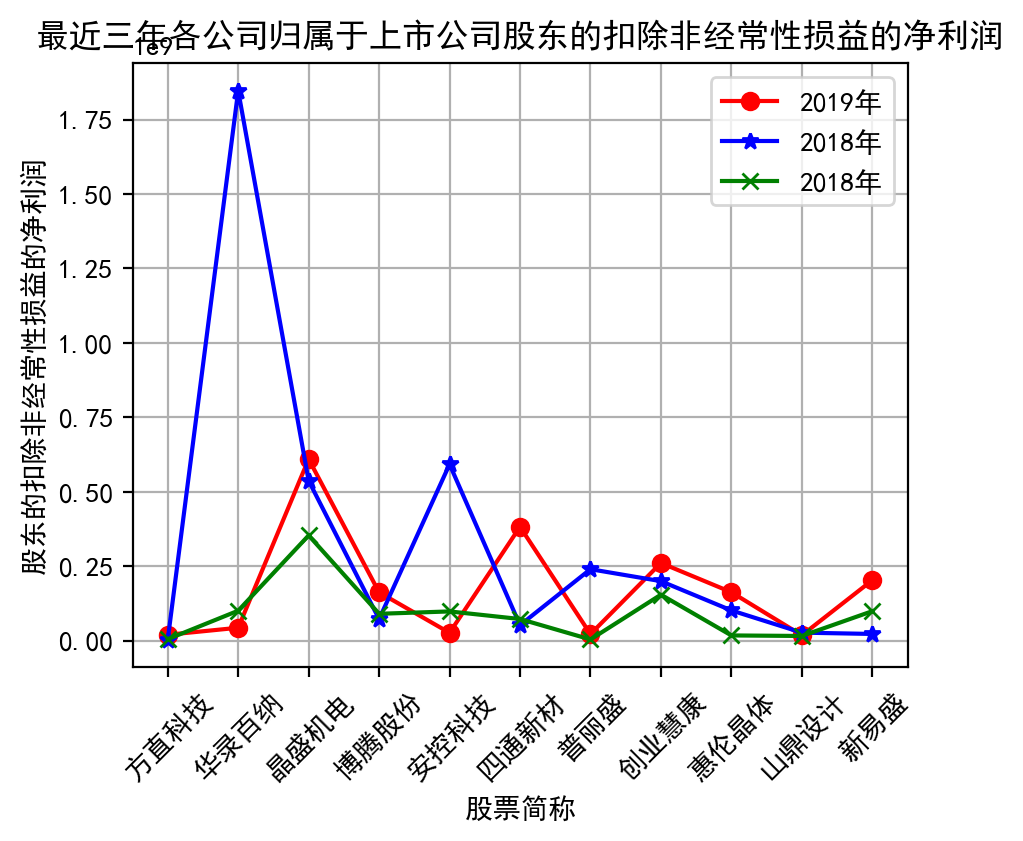

In [50]:
plt.plot(NI_2019,marker='o',c='r',label='2019年')
plt.plot(NI_2018,marker='*',c='b',label='2018年')
plt.plot(NI_2017,marker='x',c='g',label='2018年')
plt.legend(loc='best')
plt.xticks(range(11),yyds['股票简称'],rotation=45)
plt.xlabel('股票简称')
plt.ylabel('股东的扣除非经常性损益的净利润')
plt.title('最近三年各公司归属于上市公司股东的扣除非经常性损益的净利润')
plt.grid(True,axis='both')
plt.show()

* 方直科技公司最近三年归属于股东的扣除非经常性损益的净利润

In [51]:
NI_FZ = yyds.iloc[:1,6:]

In [52]:
FZ = NI_FZ.T

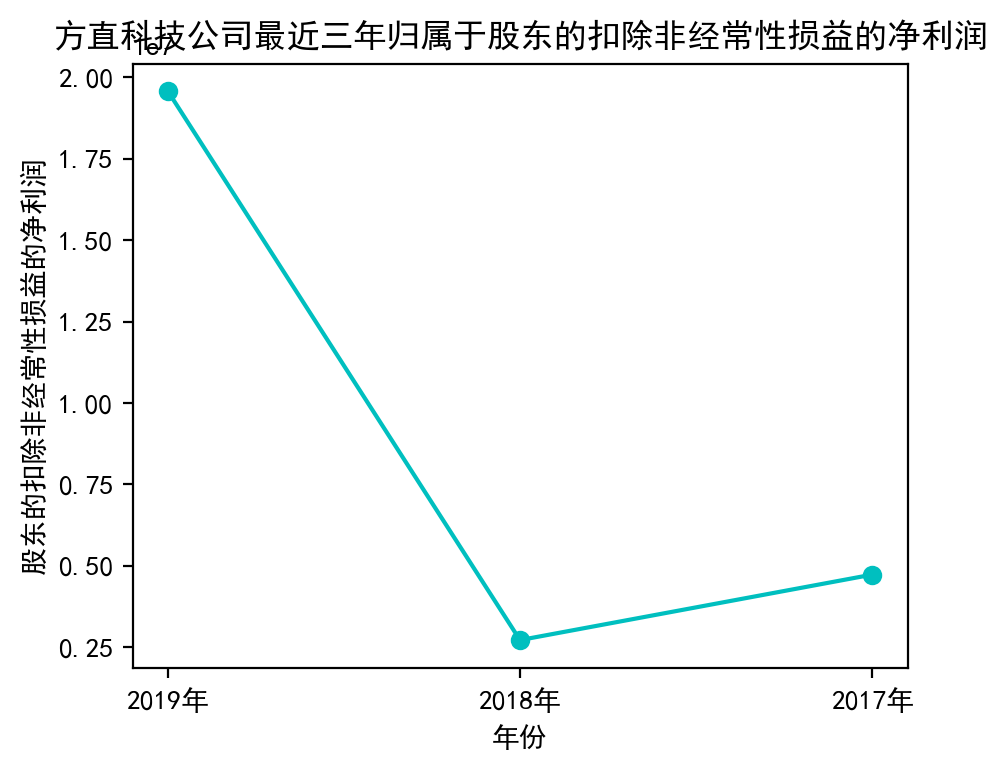

In [53]:
plt.plot(FZ,marker='o',c='c')
plt.xlabel('年份')
plt.ylabel('股东的扣除非经常性损益的净利润')
plt.title('方直科技公司最近三年归属于股东的扣除非经常性损益的净利润')
plt.show()

### 图形分析

1. 归属于股东的扣除非经常性损益的净利润可反映公司盈利结构真实性。

2. 第一张图反映了最近三年各公司归属于上市公司股东的扣除非经常性损益的净利润的波动情况。由图可知：华录百纳，安控科技等公司最近三年的波动较为剧烈。对于大部分公司而言，逐年的净利润呈上升态势。

3. 第二张图则单独基于 方直科技公司 进行数据分析。该图展示出其2019年的净利润出现大幅度的上涨的情况，表明该公司在2019年度的经营情况较好。